In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# AWA example

In [2]:
from impact import Impact, template_dir
import os

In [3]:
ifile = os.path.join(template_dir, 'awa/ImpactT.in')
os.path.exists(ifile)

True

In [4]:
# Make Impact object
I = Impact(ifile, verbose=True)

================ Impact-T Summary ================    
1 particles
1 bunch of electrons
total charge: 0.0 pC
Distribution type: read
Cathode start at z = 0 m
   emission time: 2.8e-11 s
   image charges neglected after z = 0.2 m
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 8 x 8 x 8
Maximum time steps: 300000
Reference Frequency: 1300013338.99026 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp1vss0929


In [5]:
# Show a MAD-style printout of each element in the lattice
I.print_lattice()

write_beam_1: write_beam, description=, filename=fort.81, sample_frequency=1, s=3.1
write_beam_2: write_beam, description=, filename=fort.82, sample_frequency=1, s=6.377
write_beam_3: write_beam, description=, filename=fort.83, sample_frequency=1, s=8.76
write_beam_4: write_beam, description=, filename=fort.84, sample_frequency=1, s=11.477
write_beam_5: write_beam, description=, filename=fort.85, sample_frequency=1, s=14.848
!  !!!!!!!!!!!!!!!!!! beamline starts here !!!!!!!!!!!!!!!!!!!!!!!!
! bucking solenoid  B = I / 550A
solenoid_1: solenoid, description=, L=1.17, zedge=0.0, b_field=7.272727e-05,
      filename=1T3.T7, radius=0.01, s=1.17
! focusing solenoid B = -I / 550A
solenoid_2: solenoid, description=, L=1.17, zedge=0.0, b_field=-7.272727e-05,
      filename=1T4.T7, radius=0.01, s=1.17
! matching solenoid B = -I / 350A 
solenoid_3: solenoid, description=, L=1.17, zedge=0.0, b_field=7.45454e-05,
      filename=1T5.T7, radius=0.01, s=1.17
! gun: maximum E field on-axis is:  4.701

In [6]:
# Look at an element by name
I.ele['emfield_cylindrical_1']

{'description': '',
 'original': '0.29270745 10 20 112 0.0 2.25e+01 1300.013338990260e6 1.369472e+02 1.0 0.1 0.0 0.0 0.0 0.0 0.0 /',
 'L': 0.29270745,
 'type': 'emfield_cylindrical',
 'zedge': 0.0,
 'rf_field_scale': 22.5,
 'rf_frequency': 1300013338.99026,
 'theta0_deg': 136.9472,
 'filename': '1T1.T7',
 'radius': 0.1,
 's': 0.29270745,
 'name': 'emfield_cylindrical_1'}

In [7]:
# Change its phase
I.ele['emfield_cylindrical_1']['theta0_deg'] = 120

In [8]:
# Change some other things
I.input['header']['Np'] = 10000
I.input['header']['Nx'] = 16
I.input['header']['Ny'] = 16
I.input['header']['Nz'] = 16
I.input['header']['Dt'] = 5e-13

# Other switches
#I.timeout = 1000
# Switches for MPI
I.use_mpi=True
I.input['header']['Npcol'] = 4
I.impact_bin = '$IMPACTT_MPI_BIN'
print(I)

================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 0.0 pC
Distribution type: read
Cathode start at z = 0 m
   emission time: 2.8e-11 s
   image charges neglected after z = 0.2 m
Processor domain: 1 x 4 = 4 CPUs
Space charge grid: 16 x 16 x 16
Maximum time steps: 300000
Reference Frequency: 1300013338.99026 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp1vss0929


In [9]:
# Run
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp1vss0929
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           26          26
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
 check randomness:            1  0.65948074101936072     
 check randomness:            2  0.68444898109486740     
 check randomness:            3  0.79369999429767613     
 avgpts, jlow, and jhigh:         2500           1        2500
 avgpts, jlow, and jhigh:         2500        5001        7500
 avgpts, jlow, and jhigh:         2500        2501        5000
 avgpts, jlow, and jhigh:         2500        7501       10000
 time:    79.487950999999995, elapsed: 80.1730010509491Finished.75485, elapsed: 80.16462492942813667285i,t,<z>:         117

In [10]:
I.particles.keys()

dict_keys(['initial_particles', 'final_particles', 'write_beam_1', 'write_beam_2', 'write_beam_3', 'write_beam_4'])

In [11]:
I.particles.keys()

dict_keys(['initial_particles', 'final_particles', 'write_beam_1', 'write_beam_2', 'write_beam_3', 'write_beam_4'])

In [12]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [13]:
I.output['slice_info']

{'final_particle_slices': {'slice_z': array([-3.591716e-04, -3.112820e-04, -2.633925e-04, -2.155030e-04,
         -1.676134e-04, -1.197239e-04, -7.183432e-05, -2.394477e-05,
          2.394477e-05,  7.183432e-05,  1.197239e-04,  1.676134e-04,
          2.155030e-04,  2.633925e-04,  3.112820e-04,  3.591716e-04]),
  'particles_per_cell': array([3.162667e+00, 1.693390e+00, 5.705021e+00, 1.125246e+01,
         1.709635e+01, 4.630516e+01, 1.062253e+02, 2.789561e+02,
         5.038978e+02, 6.090402e+02, 1.123984e+03, 1.320606e+03,
         1.574313e+03, 1.858445e+03, 1.757175e+03, 7.821433e+02]),
  'current': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'norm_emit_x': array([1.081293e-06, 2.778982e-06, 1.841506e-06, 2.492399e-06,
         4.814435e-06, 4.592956e-06, 2.480612e-06, 1.664250e-06,
         1.992437e-06, 1.559166e-06, 1.200047e-06, 1.515034e-06,
         1.253111e-06, 7.734740e-07, 4.304005e-07, 1.149620e-07]),
  'norm_emit_y': array([1.512505e-06, 5

# Plot

In [14]:
from bokeh.plotting import output_notebook
from bokeh.plotting import show
output_notebook(hide_banner=True)

from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Range1d
from impact.parsers import load_many_fort
from impact.parsers import UNITS

from impact.plotting import layout_plot


ds = ColumnDataSource(I.output['stats'])

In [15]:
layout = layout_plot(I.input['lattice'], plot_height=300, plot_width=600)
show(layout)

In [16]:
def plot1(y_axis, x_axis='mean_z', source=ds):
    yunit = UNITS[y_axis]
    ylabel = y_axis+' ('+yunit+')'
    
    xunit = UNITS[x_axis]
    xlabel = x_axis+' ('+xunit+')'
    p = figure(plot_width=600, plot_height=200, x_axis_label=xlabel, y_axis_label=ylabel)
    p.line( x_axis, y_axis, source=source, color='red')
    return p
show(column(
    plot1('mean_gamma'),
    plot1('sigma_x'),
    plot1('sigma_z'),
    layout
)
)

# Archiving

In [22]:
from impact import writers
import h5py

In [23]:
# This is the total bunch charge in Coulombs
total_charge = I.input['header']['Bcurr'] / I.input['header']['Bfreq']
total_charge

0.0

In [24]:
I.particles

{'initial_particles': <ParticleGroup with 10000 particles at 0x10ebe0590>,
 'final_particles': <ParticleGroup with 10000 particles at 0x10d1aa510>,
 'write_beam_1': <ParticleGroup with 10000 particles at 0x10ebda590>,
 'write_beam_2': <ParticleGroup with 10000 particles at 0x10ebda250>,
 'write_beam_3': <ParticleGroup with 10000 particles at 0x11d607650>,
 'write_beam_4': <ParticleGroup with 10000 particles at 0x11f7aa7d0>}

In [25]:
h5 = h5py.File('test.h5', 'w')

In [26]:
I.archive(h5)

<HDF5 file "test.h5" (mode r+)>

In [27]:
h5.close()

# Reading archive

In [28]:
# Reading input
from impact.archive import read_input_h5

In [29]:
h5 = h5py.File('test.h5', 'r')

In [30]:
input = read_input_h5(h5['input/'])
list(input)

['header', 'lattice', 'original_input', 'input_particle_file', 'fieldmaps']

In [31]:
list(input['fieldmaps'])

['1T1.T7', '1T2.T7', '1T3.T7', '1T4.T7', '1T5.T7', '1T6.T7']

# Read and Plot Particles

In [32]:
from bokeh.plotting import  show, output_notebook
from bokeh.layouts import column, row
output_notebook(verbose=False, hide_banner=True)
import os

from pmd_beamphysics import ParticleGroup

In [33]:
list(h5)

['input', 'output']

In [34]:
list(h5['output']['particles'])

['final_particles',
 'initial_particles',
 'write_beam_1',
 'write_beam_2',
 'write_beam_3',
 'write_beam_4']

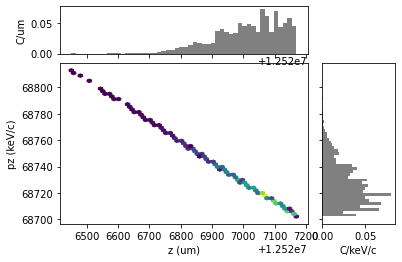

In [36]:
bunch1 = h5['output/particles/final_particles']
P =  ParticleGroup(bunch1)
P.plot('z', 'pz')

In [37]:
# Cleanup
os.remove('test.h5')